In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle

In [4]:
def plot_saves(file, header, attrb=1, y_label="Fitness Values"):
    plt.figure(figsize=(15, 9))
    plt.xlabel('No. of Generations')
    plt.ylabel(y_label)
    plt.title(header)
    
    x = range(1, 101)
    for run in file:
        y = run[attrb]
        plt.plot(x, y)

    plt.show()

In [34]:
def compare_saves(files, legends, lines, attrb=1, y_label="Fitness Values"):
    plt.figure(figsize=(15, 9))
    plt.xlabel('No. of Generations')
    plt.ylabel(y_label)
    
    x = range(1, 101)
    for j in range(len(files)):
        f = files[j]
        avg_of_runs = np.array(f[0][1])
        for i in f[1:]:
            avg_of_runs += i[attrb]
        avg_of_runs = avg_of_runs / len(f) 
        
        plt.plot(x, avg_of_runs, lines[j])
        
    plt.legend(legends)
    plt.show()

In [6]:
ga_path = 'pickles/ga/30runs/'
kbga_path = 'pickles/kbga/30runs/'
kb_path = "pickles/kb/"
de_path = 'pickles/de/'
kbde_path = 'pickles/kbde/'

In [7]:
ga_files = ['30_run_az_ga_ts_pt.pkl',
            '30_run_imdb_ga_ts_pt.pkl',
            '30_run_yelp_ga_ts_pt.pkl',
            '30_run_az_ga_ts.pkl',
            '30_run_imdb_ga_ts.pkl',
            '30_run_yelp_ga_ts.pkl'
            ]

In [8]:
kb_files = ['30_run_az_kbip_ts_pt.pkl',
            '30_run_az_kbps_ts_pt.pkl',
            '30_run_az_kbco_ts_pt.pkl',
            '30_run_az_kbmu_ts_pt.pkl',
            ]

In [9]:
kbga_files = [
            '30_run_az_kbga_vp_ts.pkl',
            '30_run_az_kbga_es50_100_ts.pkl',
            '30_run_imdb_kbga_vp_ts.pkl',
            '30_run_imdb_kbga_es50_100_ts.pkl',
            '30_run_yelp_kbga_vp_ts.pkl',
            '30_run_yelp_kbga_es50_100_ts.pkl',
            ]

In [10]:
de_files = [
            '30_run_az_de.pkl',
            'n_run_az_de_crt.pkl',
            'n_run_az_de_crt1.pkl',
            ]

In [11]:
kbde_files = [
            '30_run_az_kbde.pkl',
            'n_run_az_kbde_crt.pkl',
            'n_run_az_kbde_crt1.pkl',
            ]

## Comparison

In [12]:
rf = open(de_path+de_files[0], 'rb')
de_30 = pickle.load(rf)

rf = open(de_path+de_files[1], 'rb')
de_5 = pickle.load(rf)

rf = open(ga_path+ga_files[0], 'rb')
ga_30 = pickle.load(rf)

rf = open(kbga_path+kbga_files[0], 'rb')
kbga_30 = pickle.load(rf)

rf = open(kbde_path+kbde_files[0], 'rb')
kbde_30 = pickle.load(rf)

rf = open(kbde_path+kbde_files[1], 'rb')
kbde_5 = pickle.load(rf)

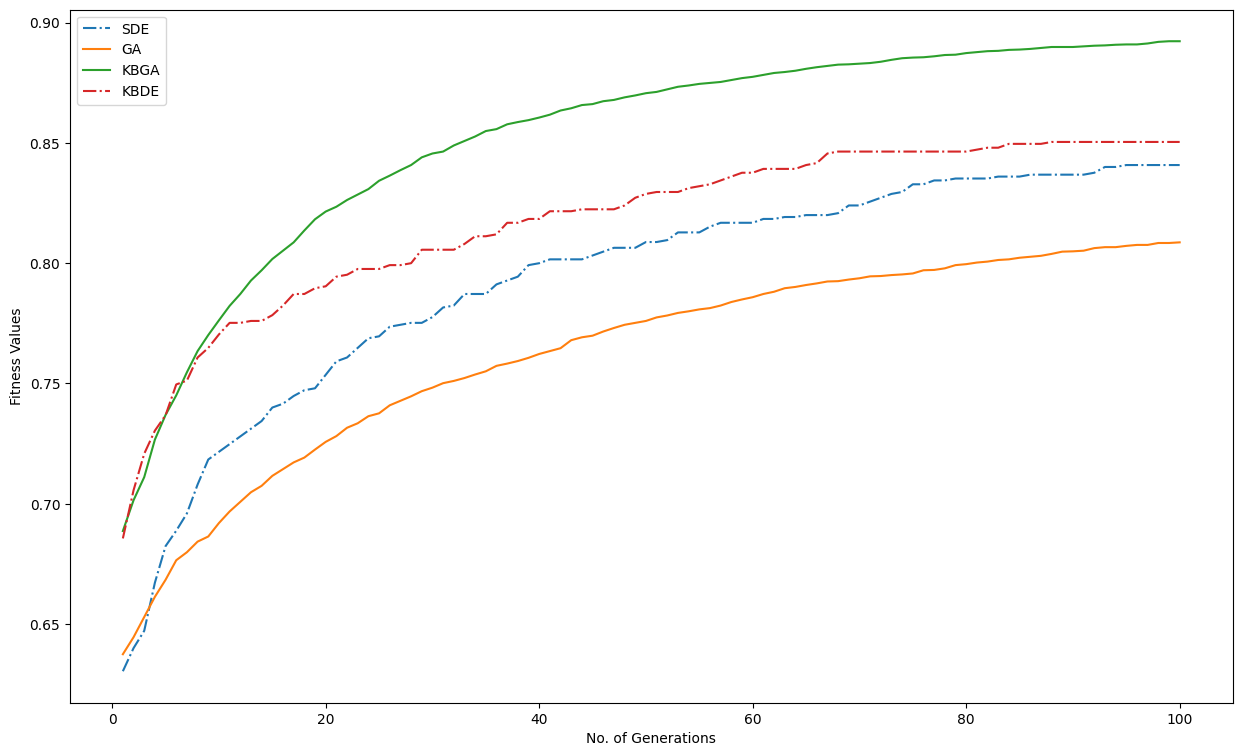

In [37]:
legends = [
    "SDE",
    "GA", "KBGA", 
    "KBDE"
    ]
lines = ['-.', '-', '-', '-.']
compare_saves(
    [de_5,
     ga_30, kbga_30, 
     kbde_5,], 
     legends, 
     lines
     )

In [14]:
rf = open(ga_path+ga_files[0], 'rb')
ga_az_pt = pickle.load(rf)

rf = open(ga_path+ga_files[1], 'rb')
ga_imdb_pt = pickle.load(rf)

rf = open(ga_path+ga_files[2], 'rb')
ga_yelp_pt = pickle.load(rf)

rf = open(ga_path+ga_files[3], 'rb')
ga_az = pickle.load(rf)

rf = open(ga_path+ga_files[4], 'rb')
ga_imdb = pickle.load(rf)

rf = open(ga_path+ga_files[5], 'rb')
ga_yelp = pickle.load(rf)

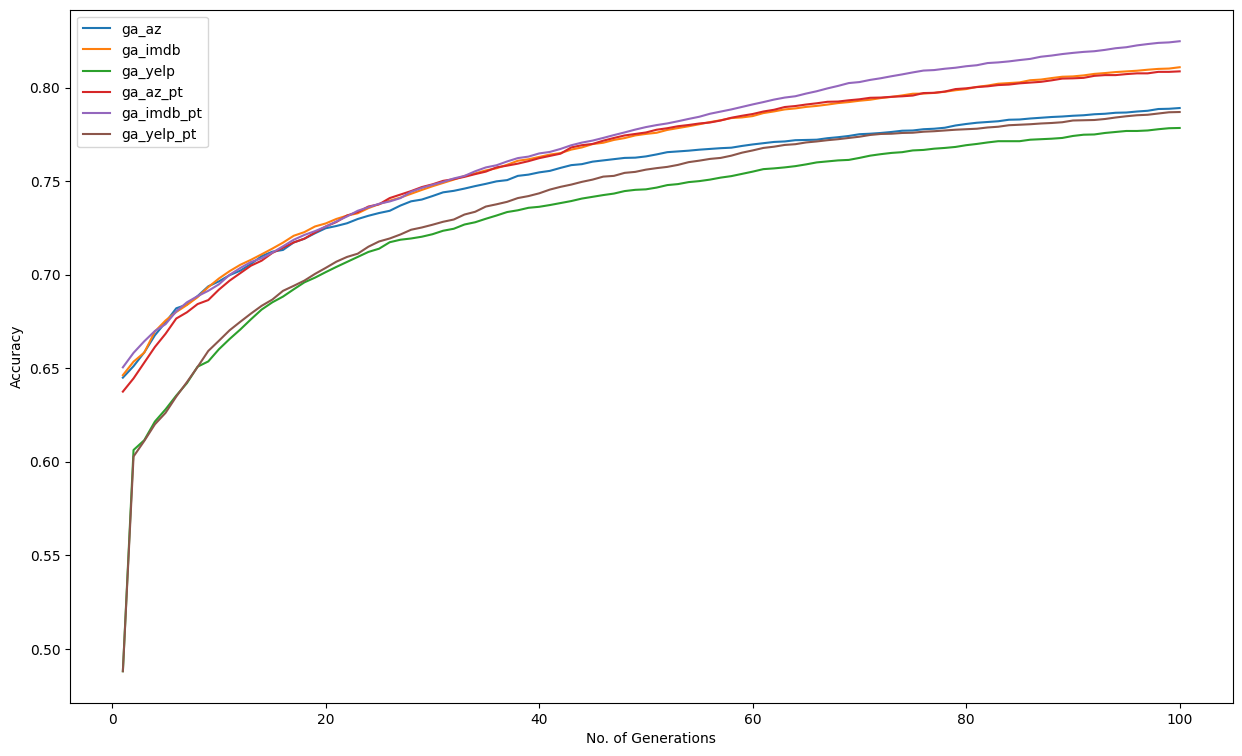

In [15]:
legends = [
    "ga_az", "ga_imdb",
    "ga_yelp", "ga_az_pt", 
    "ga_imdb_pt", "ga_yelp_pt"
    ]

compare_saves(
    [ga_az, ga_imdb,
     ga_yelp, ga_az_pt, 
     ga_imdb_pt, ga_yelp_pt,], 
     legends
     )

In [16]:
rf = open(ga_path+ga_files[0], 'rb')
ga_az_pt = pickle.load(rf)

rf = open(kb_path+kb_files[0], 'rb')
kbi = pickle.load(rf)

rf = open(kb_path+kb_files[1], 'rb')
kbs = pickle.load(rf)

rf = open(kb_path+kb_files[2], 'rb')
kbc = pickle.load(rf)

rf = open(kb_path+kb_files[3], 'rb')
kbm = pickle.load(rf)

rf = open(kbga_path+kbga_files[1], 'rb')
kbga_es50 = pickle.load(rf)

rf = open(kbga_path+kbga_files[0], 'rb')
kbga_vp = pickle.load(rf)

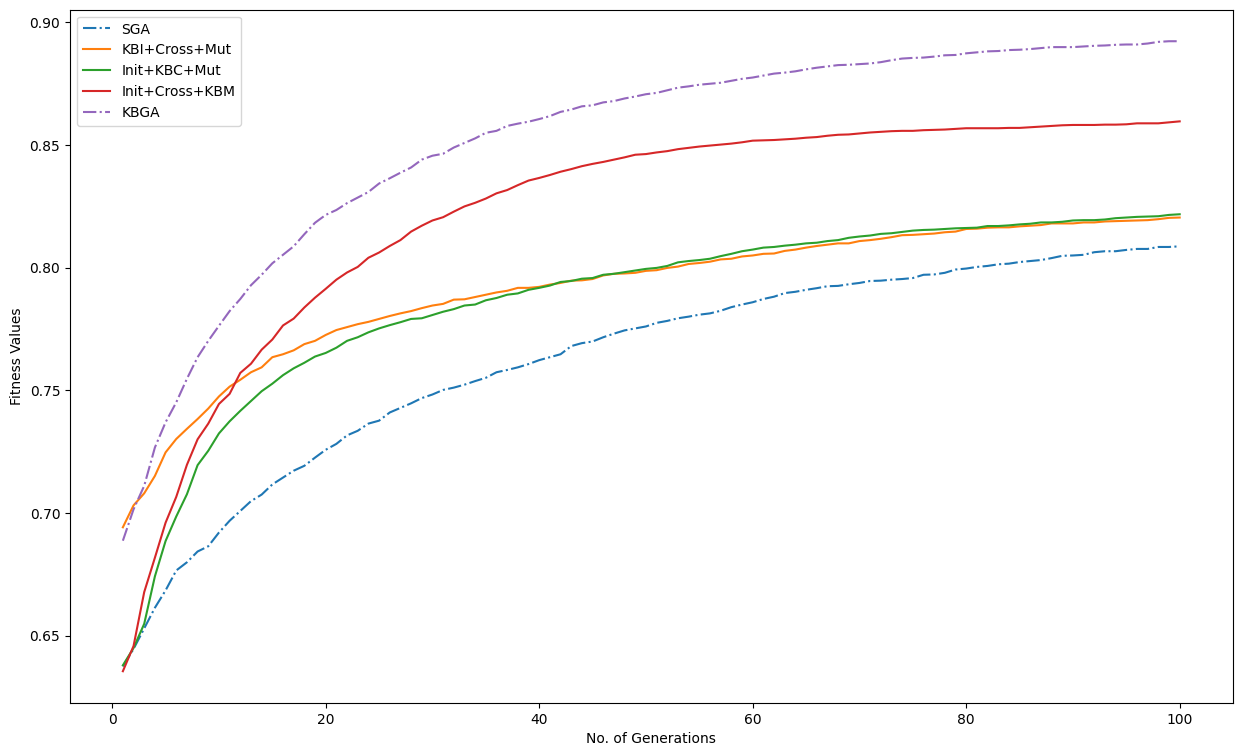

In [43]:
legends = [
    "SGA", "KBI+Cross+Mut", "Init+KBC+Mut", 
    "Init+Cross+KBM", "KBGA"
    ]

lines = ['-.', '-', '-', '-', '-.']

compare_saves(
    [ga_az_pt, kbi, kbc, 
     kbm, kbga_vp], 
     legends,
     lines,
     )

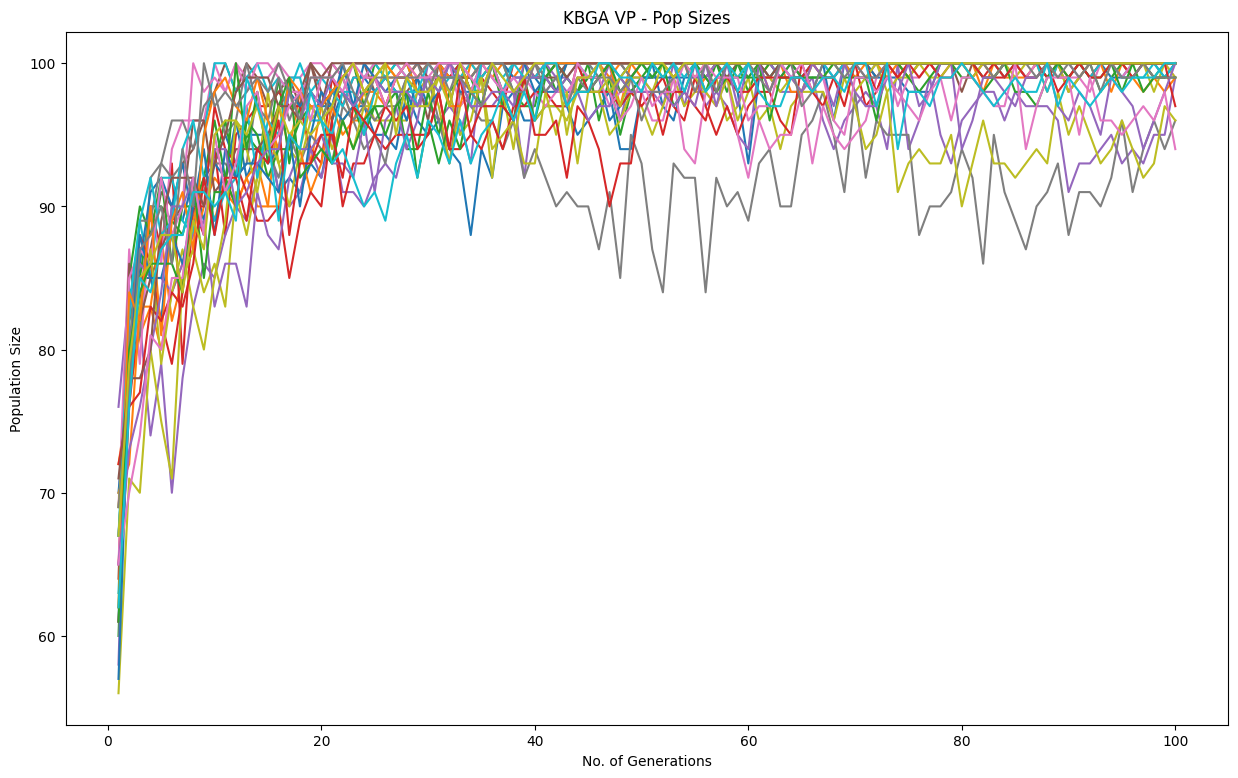

In [18]:
plot_saves(kbga_vp, "KBGA VP - Pop Sizes", attrb=2, y_label="Population Size")

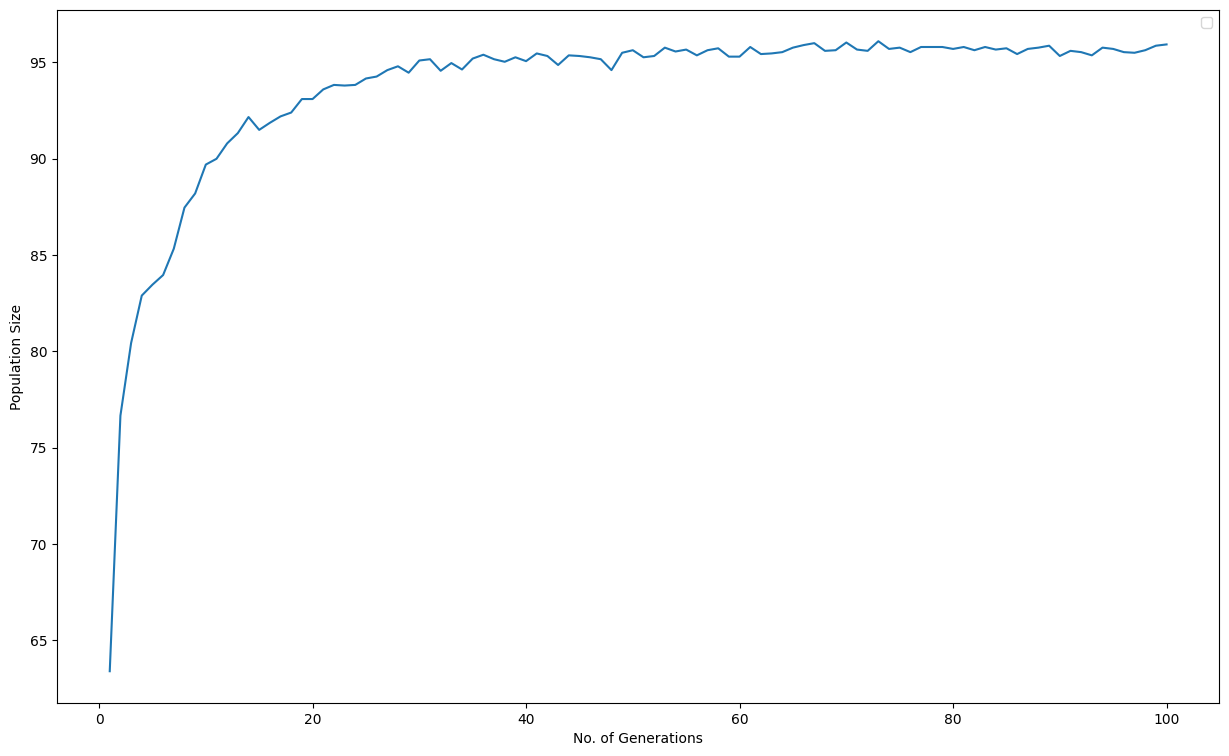

In [19]:
compare_saves([kbga_vp,], [], 2, "Population Size")